# Observing with `astroplan`

---

## Observing Date: May 18, 2020

---

## Observing Locations

1. Blue Bird Cafe, Adak, Alaska
2. Monte Café, São Tomé & Príncipe
3. Coffe Hija, Machu Picchu Base, Antarctica

---

## Observing Targets

* NGC 5457
* NGC 5713
* NGC 5979
* NGC 5643

---

In [201]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import astropy.units as u
from astropy.time import Time
import pytz

from astroplan.plots import plot_airmass
from astroplan import Observer, FixedTarget, time_grid_from_range

In [202]:
#import warnings
#warnings.filterwarnings('ignore', category=Warning)

from astroplan import download_IERS_A
download_IERS_A()

#from astroplan import get_IERS_A_or_workaround
#get_IERS_A_or_workaround()

---

## Set up the locations

In [204]:
# Location One
blue_bird_cafe = Observer(longitude = -176 * u.deg + 38 * u.arcmin + 21 * u.arcsec,
                    latitude = 51 * u.deg + 52 * u.arcmin + 14 * u.arcsec,
                    timezone = 'America/Adak',
                    name = "Blue Bird Cafe"
                    )

In [205]:
blue_bird_cafe

<Observer: name='Blue Bird Cafe',
    location (lon, lat, el)=(-175.36083333333335 deg, 51.870555555555555 deg, -7.728784961972002e-10 m),
    timezone=<DstTzInfo 'America/Adak' LMT+12:13:00 STD>>

In [206]:
# Location Two
monte_cafe = Observer(longitude = 6 * u.deg + 38 * u.arcmin + 24 * u.arcsec,
                    latitude = 0 * u.deg + 17 * u.arcmin + 59 * u.arcsec,
                    timezone = 'GMT',
                    name = "Monte Cafe"
                    )

In [207]:
monte_cafe

<Observer: name='Monte Cafe',
    location (lon, lat, el)=(6.64 deg, 0.29972222222222233 deg, 0.0 m),
    timezone=<StaticTzInfo 'GMT'>>

In [208]:
# Location Three
hija_cafe = Observer(longitude = -58 * u.deg + 28 * u.arcmin + 17 * u.arcsec,
                    latitude = -62 * u.deg + 5 * u.arcmin + 29 * u.arcsec,
                    timezone = 'Antarctica/McMurdo',
                    name = "Hija Cafe"
                    )

In [209]:
hija_cafe

<Observer: name='Hija Cafe',
    location (lon, lat, el)=(-57.52861111111111 deg, -61.90861111111112 deg, -1.0101800553693716e-09 m),
    timezone=<DstTzInfo 'Antarctica/McMurdo' LMT+11:39:00 STD>>

---
## Determine the UTC time for **Local Noon** at each of the locations
* You will have to experiment with the `which =` parameter
* Make sure your LOCAL NOON is sometime during the observing date (UTC)

In [210]:
# Location One
my_date = Time("2020-05-18")
my_date

my_noon_blue_bird = blue_bird_cafe.noon(my_date, which='next')
my_noon_blue_bird.iso

'2020-05-18 23:38:03.352'

In [211]:
# Location Two
my_noon_monte = monte_cafe.noon(my_date, which='next')
my_noon_monte.iso

'2020-05-18 11:29:50.917'

In [212]:
# Location Three
my_noon_hija = hija_cafe.noon(my_date, which='next')
my_noon_hija.iso

'2020-05-18 15:46:16.817'

---
## Determine the length of the observing run at each location

* Length of run is defined by Astronomical Twilight

In [213]:
# Location One
observe_night_blue = blue_bird_cafe.tonight(my_noon_blue_bird, horizon = -18*u.deg)
observe_time_night_blue = (observe_night_blue[1]-observe_night_blue[0]).to(u.h)
print(f"Start observations tonight at {observe_night_blue[0].iso} UTC")
print(f"End observations tonight at {observe_night_blue[1].iso} UTC")
print(f"You can observe for {observe_time_night_blue:.1f} tonight")
observe_time_night_blue

Start observations tonight at 2020-05-19 11:12:48.929 UTC
End observations tonight at 2020-05-19 12:02:36.227 UTC
You can observe for 0.8 h tonight


<Quantity 0.82980507 h>

In [214]:
# Location Two
observe_night_monte = monte_cafe.tonight(my_noon_monte, horizon = -18*u.deg)
observe_time_night_monte = (observe_night_monte[1]-observe_night_monte[0]).to(u.h)
print(f"Start observations tonight at {observe_night_monte[0].iso} UTC")
print(f"End observations tonight at {observe_night_monte[1].iso} UTC")
print(f"You can observe for {observe_time_night_monte:.1f} tonight")
observe_time_night_monte

Start observations tonight at 2020-05-18 18:47:02.882 UTC
End observations tonight at 2020-05-19 04:12:45.663 UTC
You can observe for 9.4 h tonight


<Quantity 9.42855034 h>

In [215]:
# Location Three
observe_night_hija = hija_cafe.tonight(my_noon_hija, horizon = -18*u.deg)
observe_time_night_hija = (observe_night_hija[1]-observe_night_hija[0]).to(u.h)
print(f"Start observations tonight at {observe_night_hija[0].iso} UTC")
print(f"End observations tonight at {observe_night_hija[1].iso} UTC")
print(f"You can observe for {observe_time_night_hija:.1f} tonight")
observe_time_night_hija

Start observations tonight at 2020-05-18 21:51:50.304 UTC
End observations tonight at 2020-05-19 09:42:09.981 UTC
You can observe for 11.8 h tonight


<Quantity 11.83879919 h>

---

## Set up the targets

## Where in the sky?

* Altitude (Alt) - Degrees above horizon
* Azimuth (Az) - Compass degrees from North
* `LOCATION.altaz(TIME, TARGET)`

&nbsp;

<p>
<img src="./images/AltAz.gif">
</p>

In [216]:
my_target_one = FixedTarget.from_name("NGC 5457")
my_target_one

<FixedTarget "NGC 5457" at SkyCoord (ICRS): (ra, dec) in deg (210.80242917, 54.34875)>

In [217]:
my_target_two = FixedTarget.from_name("NGC 5713")
my_target_two

<FixedTarget "NGC 5713" at SkyCoord (ICRS): (ra, dec) in deg (220.04803333, -0.28921111)>

In [218]:
my_target_three = FixedTarget.from_name("NGC 5979")
my_target_three

<FixedTarget "NGC 5979" at SkyCoord (ICRS): (ra, dec) in deg (236.9215, -61.21822222)>

In [219]:
my_target_four = FixedTarget.from_name("NGC 5643")
my_target_four

<FixedTarget "NGC 5643" at SkyCoord (ICRS): (ra, dec) in deg (218.16990833, -44.17461111)>

In [220]:
my_target_one.coord

<SkyCoord (ICRS): (ra, dec) in deg
    (210.80242917, 54.34875)>

In [221]:
my_target_two.coord

<SkyCoord (ICRS): (ra, dec) in deg
    (220.04803333, -0.28921111)>

In [222]:
my_target_three.coord

<SkyCoord (ICRS): (ra, dec) in deg
    (236.9215, -61.21822222)>

In [223]:
my_target_four.coord

<SkyCoord (ICRS): (ra, dec) in deg
    (218.16990833, -44.17461111)>

In [224]:
my_target_one.ra.hms

hms_tuple(h=14.0, m=3.0, s=12.583000800011916)

In [225]:
my_target_two.ra.hms

hms_tuple(h=14.0, m=40.0, s=11.527999200012573)

In [226]:
my_target_three.ra.hms

hms_tuple(h=15.0, m=47.0, s=41.16000000001023)

In [227]:
my_target_four.ra.hms

hms_tuple(h=14.0, m=32.0, s=40.77799920000686)

In [228]:
my_midnight_blue_bird = blue_bird_cafe.midnight(my_noon_blue_bird, which='next')
blue_bird_cafe.target_is_up(my_midnight_blue_bird, my_target_one)

True

In [229]:
my_midnight_blue_bird = blue_bird_cafe.midnight(my_noon_blue_bird, which='next')
blue_bird_cafe.target_is_up(my_midnight_blue_bird, my_target_two)

True

In [230]:
my_midnight_blue_bird = blue_bird_cafe.midnight(my_noon_blue_bird, which='next')
blue_bird_cafe.target_is_up(my_midnight_blue_bird, my_target_three)

False

In [231]:
my_midnight_blue_bird = blue_bird_cafe.midnight(my_noon_blue_bird, which='next')
blue_bird_cafe.target_is_up(my_midnight_blue_bird, my_target_four)

False

In [232]:
my_midnight_monte = monte_cafe.midnight(my_noon_monte, which='next')
monte_cafe.target_is_up(my_midnight_monte, my_target_one)

True

In [233]:
my_midnight_monte = monte_cafe.midnight(my_noon_monte, which='next')
monte_cafe.target_is_up(my_midnight_monte, my_target_two)

True

In [234]:
my_midnight_monte = monte_cafe.midnight(my_noon_monte, which='next')
monte_cafe.target_is_up(my_midnight_monte, my_target_three)

True

In [235]:
my_midnight_monte = monte_cafe.midnight(my_noon_monte, which='next')
monte_cafe.target_is_up(my_midnight_monte, my_target_four)

True

In [236]:
my_midnight_hija = hija_cafe.midnight(my_noon_hija, which='next')
hija_cafe.target_is_up(my_midnight_hija, my_target_one)

False

In [237]:
my_midnight_hija = hija_cafe.midnight(my_noon_hija, which='next')
hija_cafe.target_is_up(my_midnight_hija, my_target_two)

True

In [238]:
my_midnight_hija = hija_cafe.midnight(my_noon_hija, which='next')
hija_cafe.target_is_up(my_midnight_hija, my_target_three)

True

In [239]:
my_midnight_hija = hija_cafe.midnight(my_noon_hija, which='next')
hija_cafe.target_is_up(my_midnight_hija, my_target_four)

True

In [240]:
## First location: air mass and location at midnight for all targets

In [241]:
where_to_look_blue_bird_t1 = blue_bird_cafe.altaz(my_midnight_blue_bird, my_target_one)

In [242]:
where_to_look_blue_bird_t1.alt

<Latitude 74.47091512 deg>

In [243]:
where_to_look_blue_bird_t1.az

<Longitude 288.96416496 deg>

In [244]:
where_to_look_blue_bird_t1.secz

<Quantity 1.03788846>

In [245]:
where_to_look_blue_bird_t2 = blue_bird_cafe.altaz(my_midnight_blue_bird, my_target_two)

In [246]:
where_to_look_blue_bird_t2.alt

<Latitude 35.96328472 deg>

In [247]:
where_to_look_blue_bird_t2.az

<Longitude 200.36763087 deg>

In [248]:
where_to_look_blue_bird_t2.secz

<Quantity 1.70280382>

In [249]:
where_to_look_blue_bird_t3 = blue_bird_cafe.altaz(my_midnight_blue_bird, my_target_three)

In [250]:
where_to_look_blue_bird_t3.alt

<Latitude -23.15131608 deg>

In [251]:
where_to_look_blue_bird_t3.az

<Longitude 179.64067835 deg>

In [252]:
where_to_look_blue_bird_t3.secz

<Quantity -2.54348868>

In [253]:
where_to_look_blue_bird_t4 = blue_bird_cafe.altaz(my_midnight_blue_bird, my_target_four)

In [254]:
where_to_look_blue_bird_t4.alt

<Latitude -7.40716117 deg>

In [255]:
where_to_look_blue_bird_t4.az

<Longitude 193.01549386 deg>

In [256]:
where_to_look_blue_bird_t4.secz

<Quantity -7.75677602>

In [257]:
## Second location: air mass and location at midnight for all targets

In [258]:
where_to_look_monte_t1 = monte_cafe.altaz(my_midnight_monte, my_target_one)

In [259]:
where_to_look_monte_t1.alt

<Latitude 32.18994935 deg>

In [260]:
where_to_look_monte_t1.az

<Longitude 342.89315792 deg>

In [261]:
where_to_look_monte_t1.secz

<Quantity 1.87713114>

In [262]:
where_to_look_monte_t2 = monte_cafe.altaz(my_midnight_monte, my_target_two)

In [263]:
where_to_look_monte_t2.alt

<Latitude 74.08625711 deg>

In [264]:
where_to_look_monte_t2.az

<Longitude 267.57834097 deg>

In [265]:
where_to_look_monte_t2.secz

<Quantity 1.03985172>

In [266]:
where_to_look_monte_t3 = monte_cafe.altaz(my_midnight_monte, my_target_three)

In [267]:
where_to_look_monte_t3.alt

<Latitude 28.41453209 deg>

In [268]:
where_to_look_monte_t3.az

<Longitude 179.37129842 deg>

In [269]:
where_to_look_monte_t3.secz

<Quantity 2.10151449>

In [270]:
where_to_look_monte_t4 = monte_cafe.altaz(my_midnight_monte, my_target_four)

In [271]:
where_to_look_monte_t4.alt

<Latitude 42.72919009 deg>

In [272]:
where_to_look_monte_t4.az

<Longitude 197.24993077 deg>

In [273]:
where_to_look_monte_t4.secz

<Quantity 1.47376551>

In [274]:
## Third location: air mass and location at midnight for all targets

In [275]:
where_to_look_hija_t1 = hija_cafe.altaz(my_midnight_hija, my_target_one)

In [276]:
where_to_look_monte_t1.alt

<Latitude 32.18994935 deg>

In [277]:
where_to_look_monte_t1.az

<Longitude 342.89315792 deg>

In [278]:
where_to_look_hija_t1.secz

<Quantity -2.1383472>

In [279]:
where_to_look_hija_t2 = hija_cafe.altaz(my_midnight_hija, my_target_two)

In [280]:
where_to_look_hija_t2.alt

<Latitude 27.26397553 deg>

In [281]:
where_to_look_hija_t2.az

<Longitude 341.77529172 deg>

In [282]:
where_to_look_hija_t2.secz

<Quantity 2.18297357>

In [283]:
where_to_look_hija_t3 = monte_cafe.altaz(my_midnight_hija, my_target_three)

In [284]:
where_to_look_hija_t3.alt

<Latitude 12.21756212 deg>

In [285]:
where_to_look_hija_t3.az

<Longitude 206.04582967 deg>

In [286]:
where_to_look_hija_t3.secz

<Quantity 4.72535346>

In [287]:
where_to_look_hija_t4 = monte_cafe.altaz(my_midnight_hija, my_target_four)

In [288]:
where_to_look_hija_t4.alt

<Latitude 5.42472101 deg>

In [289]:
where_to_look_hija_t4.az

<Longitude 225.44310298 deg>

In [290]:
where_to_look_hija_t4.secz

<Quantity 10.57777358>

---
## Make an airmass plot for each location for the observing night

* Plot all of the targets on each plot
* Plot size: Width - 12 in

In [291]:
my_time_grid_blue = time_grid_from_range(observe_night_blue, time_resolution = 1 * u.min)

In [292]:
my_time_grid_blue

<Time object: scale='utc' format='jd' value=[2458988.96723297 2458988.96792742 2458988.96862186 2458988.96931631
 2458988.97001075 2458988.97070519 2458988.97139964 2458988.97209408
 2458988.97278853 2458988.97348297 2458988.97417742 2458988.97487186
 2458988.97556631 2458988.97626075 2458988.97695519 2458988.97764964
 2458988.97834408 2458988.97903853 2458988.97973297 2458988.98042742
 2458988.98112186 2458988.9818163  2458988.98251075 2458988.98320519
 2458988.98389964 2458988.98459408 2458988.98528853 2458988.98598297
 2458988.98667742 2458988.98737186 2458988.9880663  2458988.98876075
 2458988.98945519 2458988.99014964 2458988.99084408 2458988.99153853
 2458988.99223297 2458988.99292742 2458988.99362186 2458988.9943163
 2458988.99501075 2458988.99570519 2458988.99639964 2458988.99709408
 2458988.99778853 2458988.99848297 2458988.99917741 2458988.99987186
 2458989.0005663  2458989.00126075]>

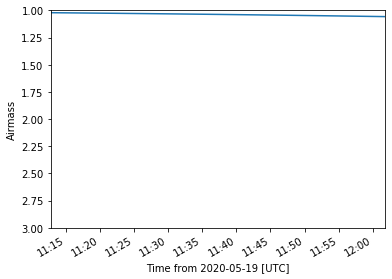

In [293]:
plot_airmass(my_target_one, blue_bird_cafe, my_time_grid_blue);

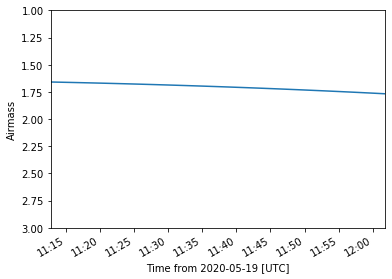

In [294]:
plot_airmass(my_target_two, blue_bird_cafe, my_time_grid_blue);

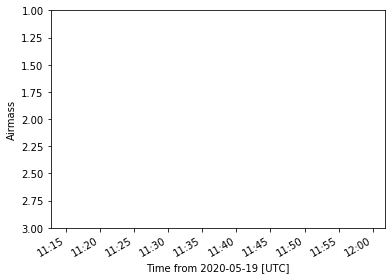

In [295]:
plot_airmass(my_target_three, blue_bird_cafe, my_time_grid_blue);

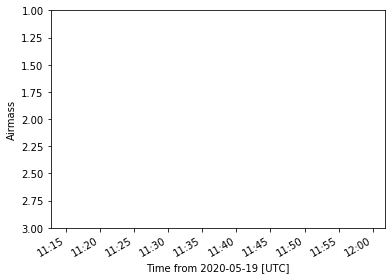

In [296]:
plot_airmass(my_target_four, blue_bird_cafe, my_time_grid_blue);

In [297]:
target_list_L1 = [my_target_one, my_target_two, my_target_three, my_target_four]

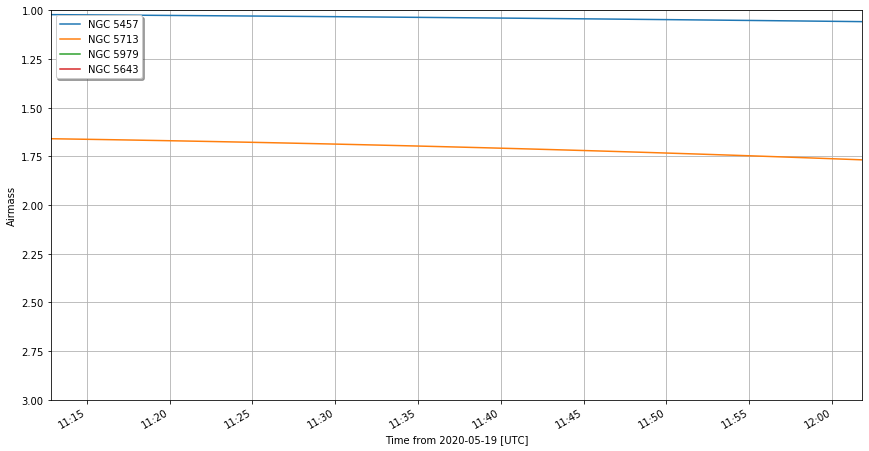

In [298]:
# Location One
fig,ax = plt.subplots(1,1)
fig.set_size_inches(12,6)

fig.tight_layout()

for my_object in target_list_L1:
    ax = plot_airmass(my_object, blue_bird_cafe, my_time_grid_blue)

ax.legend(loc=0,shadow=True);
plt.grid(True)
plt.savefig('Location 1')

In [299]:
my_time_grid_monte = time_grid_from_range(observe_night_monte, time_resolution = 1 * u.h)

In [300]:
my_time_grid_monte

<Time object: scale='utc' format='jd' value=[2458988.28267225 2458988.32433891 2458988.36600558 2458988.40767224
 2458988.44933891 2458988.49100558 2458988.53267224 2458988.57433891
 2458988.61600558 2458988.65767224]>

In [301]:
target_list_L2 = [my_target_one, my_target_two, my_target_three, my_target_four]

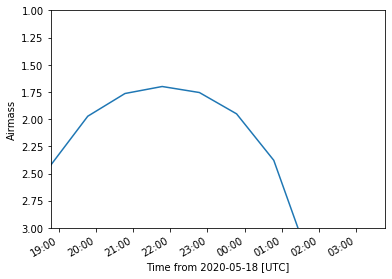

In [302]:
plot_airmass(my_target_one, monte_cafe, my_time_grid_monte);

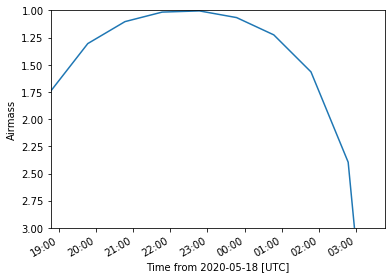

In [303]:
plot_airmass(my_target_two, monte_cafe, my_time_grid_monte);

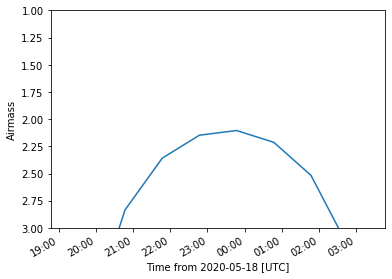

In [304]:
plot_airmass(my_target_three, monte_cafe, my_time_grid_monte);

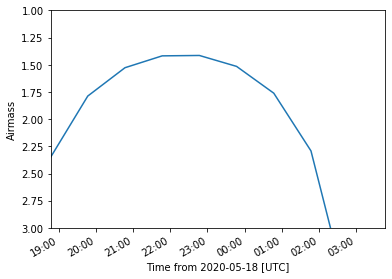

In [305]:
plot_airmass(my_target_four, monte_cafe, my_time_grid_monte);

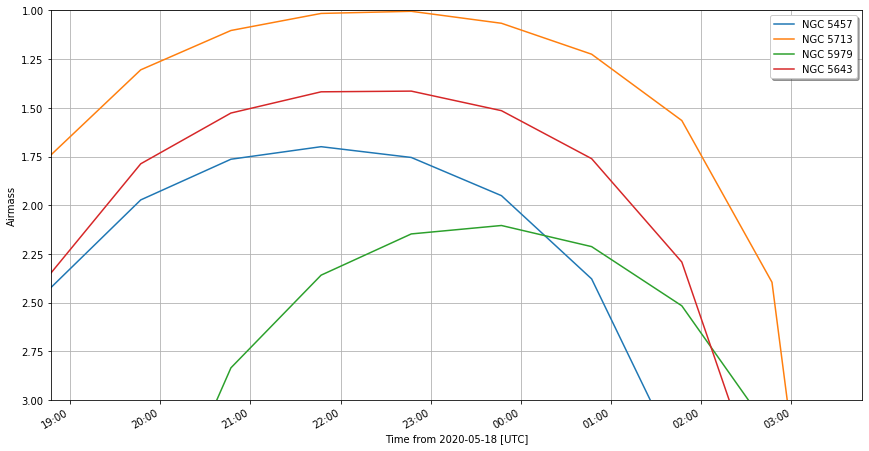

In [306]:
# Location Two
fig,ax = plt.subplots(1,1)
fig.set_size_inches(12,6)

fig.tight_layout()

for my_object in target_list_L1:
    ax = plot_airmass(my_object, monte_cafe, my_time_grid_monte)

ax.legend(loc=0,shadow=True);
plt.grid(True)
plt.savefig('Location 2')

In [307]:
my_time_grid_hija = time_grid_from_range(observe_night_hija, time_resolution = 1 * u.h)

In [308]:
my_time_grid_hija

<Time object: scale='utc' format='jd' value=[2458988.41099889 2458988.45266555 2458988.49433222 2458988.53599889
 2458988.57766555 2458988.61933222 2458988.66099888 2458988.70266555
 2458988.74433222 2458988.78599888 2458988.82766555 2458988.86933222]>

In [309]:
target_list_L3 = [my_target_one, my_target_two, my_target_three, my_target_four]

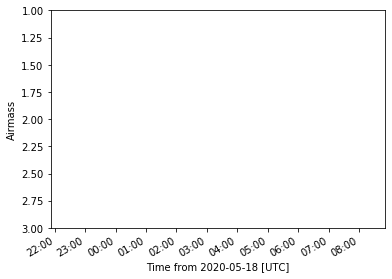

In [310]:
plot_airmass(my_target_one, hija_cafe, my_time_grid_hija);

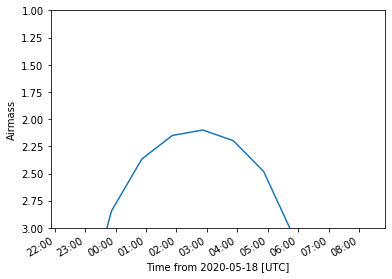

In [311]:
plot_airmass(my_target_two, hija_cafe, my_time_grid_hija);

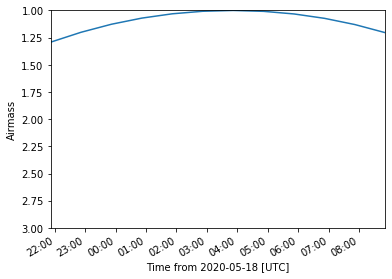

In [312]:
plot_airmass(my_target_three, hija_cafe, my_time_grid_hija);

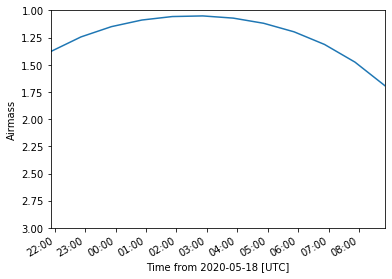

In [313]:
plot_airmass(my_target_four, hija_cafe, my_time_grid_hija);

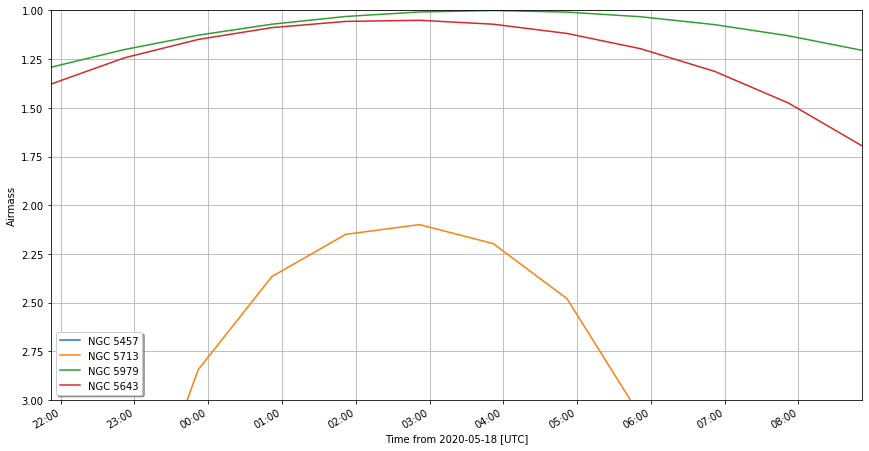

In [314]:
# Location Three
fig,ax = plt.subplots(1,1)
fig.set_size_inches(12,6)

fig.tight_layout()

for my_object in target_list_L1:
    ax = plot_airmass(my_object, hija_cafe, my_time_grid_hija)

ax.legend(loc=0,shadow=True);
plt.grid(True)
plt.savefig('Location 3')

---
## Due Mon Feb 24 - 1 pm
* `File -> Download as -> HTML (.html)`
* `upload your .html file to the class Canvas page`